In [1]:
import os
args = os.getenv("ARGS", "release real").split(" ")
release = args[0]
arch = args[1]

In [2]:
assert arch == "real"

In [3]:
try:
    import google.colab  # noqa: F401
except ImportError:
    import dolfin
    import ufl_legacy
else:
    try:
        import dolfin
        import ufl_legacy
    except ImportError:
        if release != "development":
            !wget "https://fem-on-colab.github.io/releases/fenics-install-release-real.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
        else:
            !wget "https://fem-on-colab.github.io/releases/fenics-install-development-real.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
        import dolfin
        import ufl_legacy

--2025-04-03 04:45:32--  https://fem-on-colab.github.io/releases/fenics-install-release-real.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4180 (4.1K) [application/x-sh]
Saving to: ‘/tmp/fenics-install.sh’

/tmp/fenics-install 100%[===================>]   4.08K  --.-KB/s    in 0s      

2025-04-03 04:45:32 (44.7 MB/s) - ‘/tmp/fenics-install.sh’ saved [4180/4180]

+ INSTALL_PREFIX=/usr/local
++ echo /usr/local
++ awk -F/ '{print NF-1}'
+ INSTALL_PREFIX_DEPTH=2
+ PROJECT_NAME=fem-on-colab
+ SHARE_PREFIX=/usr/local/share/fem-on-colab
+ FENICS_INSTALLED=/usr/local/share/fem-on-colab/fenics.installed
+ [[ ! -f /usr/local/share/fem-on-colab/fenics.installed ]]
+ PYBIND11_INSTALL_SCRIPT_PATH=https://github.com/fem-on-colab/fem-on-colab.github.io/raw/1f33a7ab/releases/pybi

In [7]:
from fenics import *
from dolfin import *
from mshr import *

# Creacion de la malla

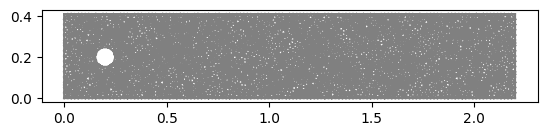

In [21]:
# Create mesh
channel = Rectangle(Point(0, 0), Point(2.2, 0.41))
cylinder = Circle(Point(0.2, 0.2), 0.05)
domain = channel - cylinder
mesh = generate_mesh(domain, 64)
plot(mesh)

# Funciones de espacio

In [17]:
# Define function spaces
P2 = VectorElement("Lagrange", mesh.ufl_cell(), 2)
P1 = FiniteElement("Lagrange", mesh.ufl_cell(), 1)
TH = P2 * P1
W = FunctionSpace(mesh, TH)